In [5]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from omegaconf import OmegaConf

from speedtest.utils.visualization import plot_comparison_histogram
from speedtest.utils.transform import OutlierRemover

In [23]:
# Reduce default figure size
plt.rcParams['figure.figsize'] = (4, 3)

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [7]:
cfg = OmegaConf.load('../../speedtest/conf/config.yaml')

## Explore the dataset

In [35]:
df = pd.read_csv('../../data/processed/netztest-opendata-processed.csv')

In [36]:
df.sample(5)

,lat,long,download_mbit,upload_mbit,ping_ms,lte_rsrp,platform,network_name,time_utc,cat_technology
31191,51.515735,7.613008,1.943,0.760,46.2,-111.0,Android,o2 - de | spusu,2023-09-14 13:19:16,4G
34131,48.157060,16.177936,86.162,8.114,40.0,NaN,iOS,NaN,2023-09-16 08:50:31,5G
15999,48.243715,16.389182,43.289,0.661,20.6,-99.0,Android,3 AT,2023-09-01 16:03:02,4G
18896,48.210941,16.244041,64.029,30.593,20.0,-108.0,Android,Magenta-T-,2023-09-04 12:37:13,5G
24005,47.867928,16.392009,24.331,2.832,19.8,-111.0,Android,Magenta-T-,2023-09-08 09:01:01,4G


### Measure descriptions

| Name | Description |
|---|---|
| lat & long | Location of the test |
| download_mbit & upload_mbit | Transmission speed in mbit/s |
| ping_ms | Time it takes for a small dataset to be transmitted from a device to a server on the Internet and back in milliseconds|
| lte_rsrp | Reference Signal Received Power - Measure for signal level and quality
| platform| Operating system of the device |
| network_name | Name of the telco provider |
| time_utc | When the test was conducted |
| cat_technology | Wireless network technoloy |

In [37]:
df.isnull().mean()

lat               0.099763
long              0.099763
download_mbit     0.000000
upload_mbit       0.000000
ping_ms           0.000754
lte_rsrp          0.410863
platform          0.000000
network_name      0.394969
time_utc          0.000000
cat_technology    0.000000
dtype: float64

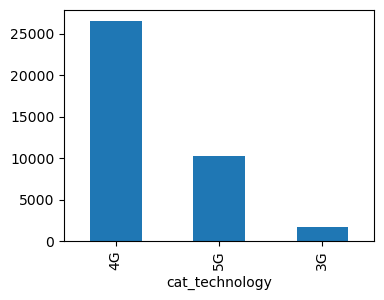

In [38]:
# Target variable
df.cat_technology.value_counts().plot(kind='bar')
plt.show()

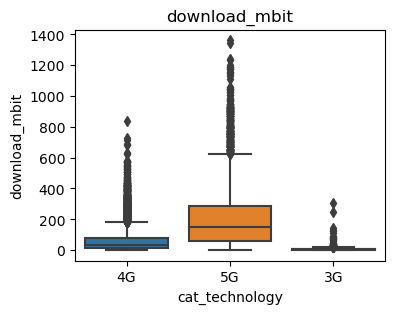

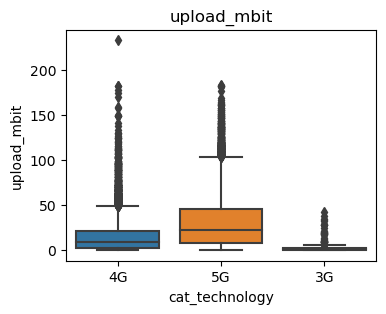

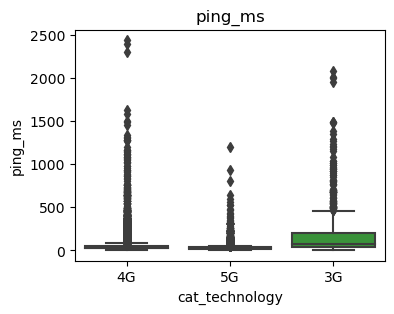

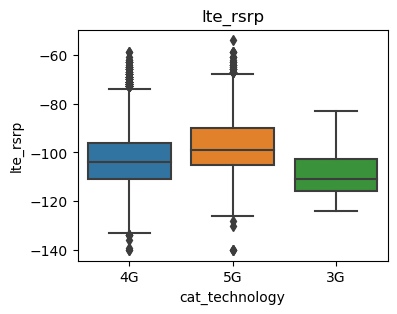

In [39]:
for metric in ['download_mbit', 'upload_mbit', 'ping_ms', 'lte_rsrp']:
    sns.boxplot(x='cat_technology', y=metric, data=df)
    plt.title(metric)
    plt.show()

In [40]:
df.platform.value_counts()

platform
Android    25112
iOS        13329
Name: count, dtype: int64

In [51]:
df.network_name.value_counts()[:15]

network_name
Magenta-T-    3758
3 AT          3613
A1            2262
A1 AT         1358
HoT            925
spusu          821
3AT            804
               550
yesss!         500
o2 - de        428
elisa          375
DNA            329
Telia FI       328
TRUE-H         292
bob            246
Name: count, dtype: int64

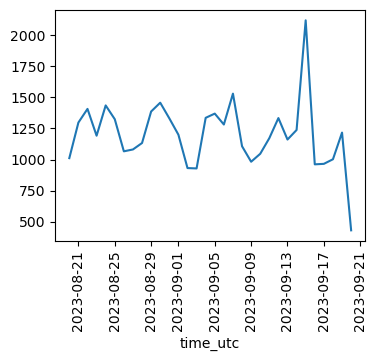

In [49]:
pd.to_datetime(df.time_utc).dt.date.value_counts().sort_index().plot()
plt.xticks(rotation=90)
plt.show()